In [1]:
import pandas as pd
import numpy as np
import scipy.io
import math
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from collections import Counter
from matplotlib.colors import Normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0] + 1)
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):

            pretty(value, indent + 2)
            print('-----------------------')
        else:
            print('\t' * (indent + 2) + str(value))
            print(" ")
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
def rms(arr):
    n = len(arr)
    squared = np.array(arr) * np.array(arr)
    sum = np.sum(squared)
    mean = (sum / (float)(n))
    root = math.sqrt(mean)
    return root
def mav(arr):
    n = len(arr)
    mav = sum((abs(np.array(arr))))/(float)(n)
    return mav
def var(arr):
    n = len(arr)
    squared = np.array(arr) * np.array(arr)
    sum = np.sum(squared)
    result = (sum / (float)(n))
    return result
def wl(arr):
    n = len(arr)
    sum = 0
    for i in range(1, n):
        sum += abs(arr[i] - arr[i - 1])
    return sum
def iav(arr):
    return sum(abs(np.array(arr)))
def extractSubject(name):
    ex1Path = 'DB1/' + name + '/' + name + '_A1_E1.mat'
    print(ex1Path)
    ex1 = scipy.io.loadmat(ex1Path)
    emg = ex1['emg']
    EMGdf = pd.DataFrame.from_dict(emg)
    stimulus = ex1['stimulus']

    ex2Path = 'DB1/' + name + '/' + name + '_A1_E2.mat'
    ex2 = scipy.io.loadmat(ex2Path)
    emg2 = ex2['emg']
    EMGdf2 = pd.DataFrame.from_dict(emg2)
    stimulus2 = ex2['stimulus']

    ex3Path = 'DB1/' + name + '/' + name + '_A1_E3.mat'
    ex3 = scipy.io.loadmat(ex3Path)
    emg3 = ex3['emg']
    EMGdf3 = pd.DataFrame.from_dict(emg3)
    stimulus3 = ex3['stimulus']

    Movements = {}
    for m in range(1, 53):
        if (m < 13):
            movementIndices = np.where(stimulus == m)[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf
        elif (m < 30):
            movementIndices = np.where(stimulus2 == (m - 12))[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf2
        else:
            movementIndices = np.where(stimulus3 == (m - 29))[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf3

        Electrodes = {}
        for e in range(1, 11):
            temp = {}
            for r in range(1, 7):
                startIndex = repetitions[r - 1][0]
                LastIndex = repetitions[r - 1][len(repetitions[r - 1]) - 1]
                df = EMG.iloc[startIndex:LastIndex, e - 1]
                df.reset_index(drop=True, inplace=True)
                narray = df.to_numpy(dtype=None, copy=False)
                temp["R{0}".format(r)] = narray
            Electrodes["Electrode{0}".format(e)] = temp
        Movements["Movement{0}".format(m)] = Electrodes
    return Movements
def Average(lst):
    return sum(lst) / len(lst)


In [30]:
subjects_accuracy = pd.DataFrame(columns={'Accuracy', 'Accuracy_Modified'})
pca_window = []
pca_movement = []
final_df = pd.DataFrame(columns={
                           'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
                           'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
                           'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
                           'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
                           'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
                           'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
                           'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
                           'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
                           'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
                           'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
                           'Train','Movement'})

for s in range(1,28):
    subject = 'S' + str(s)
    dff = pd.DataFrame.from_dict(extractSubject(subject))
    df = pd.DataFrame(columns={
                                  'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
                                  'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
                                  'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
                                  'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
                                  'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
                                  'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
                                  'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
                                  'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
                                  'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
                                  'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
                                  'Train','Movement'})
    for e in range(1, 11):
        i = 0
        electrode = 'Electrode' + str(e)
        for m in range(30,53):
                M = dff['Movement'+str(m)][electrode]
                for r in range(1, 7):
                    rep = "R" + str(r)
                    if (r in [1, 3, 4, 6]):
                        train = 1
                    else:
                        train = 0   
                    for x in range(0, len(M[rep]), 20):
                        df.at[i, 'RMS' + str(e)] = rms(M[rep][x:x + 50])
                        df.at[i, 'MAV' + str(e)] = mav(M[rep][x:x + 50])
                        df.at[i, 'VAR' + str(e)] = var(M[rep][x:x + 50])
                        df.at[i, 'WL' + str(e)] = wl(M[rep][x:x + 50])
                        df.at[i, 'IAV' + str(e)] = iav(M[rep][x:x + 50])
                        df.at[i, 'Movement'] = m
                        df.at[i, 'Train'] = train
                        i += 1   


    final_df = final_df.append(df, ignore_index=True)

DB1/S1/S1_A1_E1.mat
DB1/S2/S2_A1_E1.mat
DB1/S3/S3_A1_E1.mat
DB1/S4/S4_A1_E1.mat
DB1/S5/S5_A1_E1.mat
DB1/S6/S6_A1_E1.mat
DB1/S7/S7_A1_E1.mat
DB1/S8/S8_A1_E1.mat
DB1/S9/S9_A1_E1.mat
DB1/S10/S10_A1_E1.mat
DB1/S11/S11_A1_E1.mat
DB1/S12/S12_A1_E1.mat
DB1/S13/S13_A1_E1.mat
DB1/S14/S14_A1_E1.mat
DB1/S15/S15_A1_E1.mat
DB1/S16/S16_A1_E1.mat
DB1/S17/S17_A1_E1.mat
DB1/S18/S18_A1_E1.mat
DB1/S19/S19_A1_E1.mat
DB1/S20/S20_A1_E1.mat
DB1/S21/S21_A1_E1.mat
DB1/S22/S22_A1_E1.mat
DB1/S23/S23_A1_E1.mat
DB1/S24/S24_A1_E1.mat
DB1/S25/S25_A1_E1.mat
DB1/S26/S26_A1_E1.mat
DB1/S27/S27_A1_E1.mat


In [31]:
features = { 
    # 'MAV1','MAV2', 'MAV3', 'MAV4', 'MAV5', 'MAV6', 'MAV7', 'MAV8', 'MAV9', 'MAV10',
    # 'RMS1','RMS2','RMS3','RMS3','RMS4','RMS5','RMS6','RMS7','RMS8','RMS9','RMS10',
    # 'IAV1','IAV2', 'IAV3', 'IAV4', 'IAV5', 'IAV6', 'IAV7', 'IAV8', 'IAV9', 'IAV10',
    # 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9', 'VAR10'
      
            'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
            'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
            'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
            'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
            'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
            'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
            'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
            'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
            'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
            'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
            }

X_train = final_df[final_df['Train'] == 1].loc[:, features]
scalar =  StandardScaler()
scalar = scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = final_df[final_df['Train'] == 0].loc[:, features]
X_test = scalar.transform(X_test)

y_train = final_df[final_df['Train'] == 1].loc[:, 'Movement']
y_test = final_df[final_df['Train'] == 0].loc[:, 'Movement']

y_train = np.asarray(y_train).astype('float64')
y_test = np.asarray(y_test).astype('float64')
X_train = np.asarray(X_train).astype('float64')
# print(X_train)



In [32]:
clf = RandomForestClassifier(n_estimators=100)
print('Sub')
clf.fit(X_train, y_train)
print('finished fitting')
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_test_new = [most_frequent(y_test[x:x + 26]) for x in range(0, len(y_test), 26)]
y_predicted_new = [most_frequent(y_pred[x:x + 26]) for x in range(0, len(y_pred), 26)]
accuracy_modified = accuracy_score(y_test_new, y_predicted_new)
print("Window Accuracy",accuracy)
print("Movement Accuracy", accuracy_modified)

Sub
finished fitting
Window Accuracy 0.49253777461916387
Movement Accuracy 0.8674698795180723


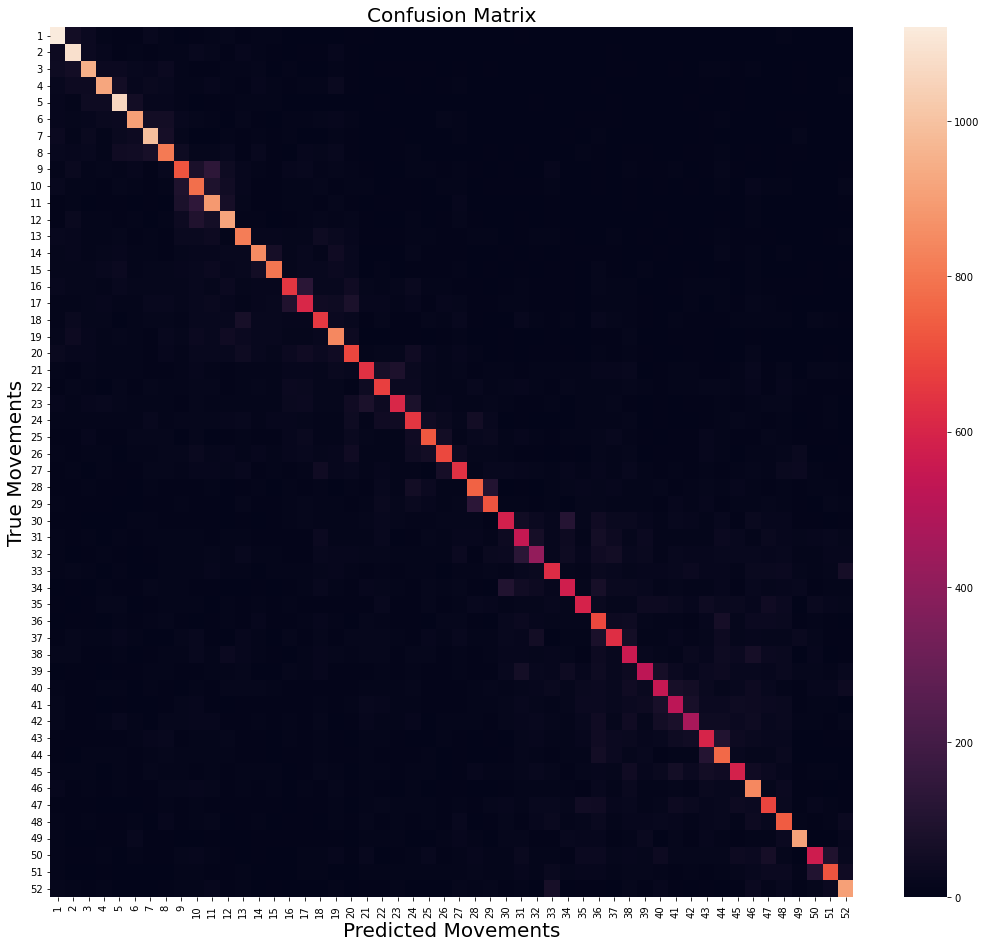

NameError: name 'y_true' is not defined

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

### Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

## Get Class Labels
# labels = le.classes_
class_names = range(1,53)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(18, 16))
ax= plt.subplot()
sns.heatmap(cm, annot=False, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted Movements', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Movements', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()
print(metrics.classification_report(y_true, y_pred, digits=3))

In [46]:
pcas =[]
x = final_df.loc[:, features]
y = final_df.loc[:,['Movement']].values
y=y.astype('int')
x = StandardScaler().fit_transform(x)
for p in range(5,51):
    pca = PCA(n_components=p)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data=principalComponents)
    finalDf = pd.concat([principalDf, final_df['Movement'], final_df['Train']], axis=1)

    X_train = finalDf[finalDf['Train'] == 1]
    X_train.drop({'Movement', 'Train'}, axis=1, inplace=True)
    X_test = finalDf[finalDf['Train'] == 0]
    X_test.drop({'Movement', 'Train'}, axis=1, inplace=True)
    y_train = finalDf[finalDf['Train'] == 1]['Movement'].astype('int')
    y_test = finalDf[finalDf['Train'] == 0]['Movement'].astype('int')

    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_test_new = [most_frequent(y_test[x:x + 26]) for x in range(0, len(y_test), 26)]
    y_predicted_new = [most_frequent(y_pred[x:x + 26]) for x in range(0, len(y_pred), 26)]
    accuracy_modified = accuracy_score(y_test_new, y_predicted_new)
    print(accuracy_modified)
    pcas.append(accuracy_modified)

0.5398293029871978
0.6877667140825036
0.7560455192034139
0.8019203413940256
0.8232574679943101
0.8435277382645804
0.852773826458037
0.8513513513513513
0.8584637268847796
0.854551920341394
0.8598862019914651
0.864153627311522
0.8677098150782361
0.8648648648648649
0.8662873399715505
0.8705547652916074
0.8673541963015647
0.8737553342816501
0.8773115220483642
0.878022759601707
0.881578947368421
0.8822901849217639
0.8819345661450925
0.8819345661450925
0.884068278805121
0.885846372688478
0.885846372688478
0.8862019914651493
0.8862019914651493
0.8869132290184921
0.8879800853485064
0.8894025604551921
0.8897581792318634
0.8886913229018493
0.887624466571835
0.8879800853485064
0.8883357041251778
0.887624466571835
0.887624466571835
0.8883357041251778
0.8879800853485064
0.8886913229018493
0.8886913229018493
0.8886913229018493
0.8886913229018493
0.8886913229018493


[0.54 0.69 0.76 0.8  0.82 0.84 0.85 0.85 0.86 0.85 0.86 0.86 0.87 0.86
 0.87 0.87 0.87 0.87 0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.89 0.89 0.89
 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89
 0.89 0.89 0.89 0.89]
[0.54 0.69 0.76 0.8  0.82 0.84 0.85 0.85 0.86 0.85 0.86 0.86 0.87 0.86
 0.87 0.87 0.87 0.87 0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.89 0.89 0.89
 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89
 0.89 0.89 0.89 0.89]


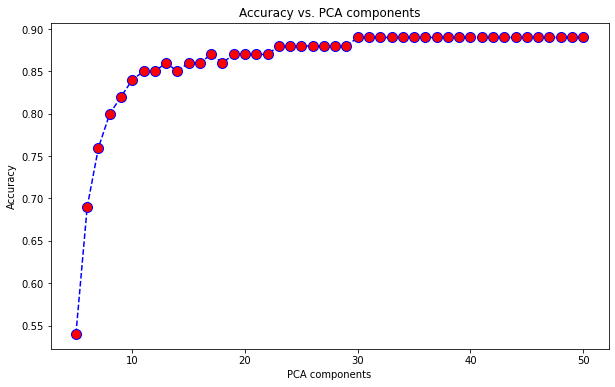

In [56]:
print(pcas)
pcas = np.around(pcas, decimals=2)
print(pcas)

plt.figure(figsize=(10,6))
plt.plot(range(5,51),pcas,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. PCA components')
plt.xlabel('PCA components')
plt.ylabel('Accuracy')
plt.show()

# x =  range(5,51)  # the label locations
# width = 0.1  # the width of the bars
# fig, ax = plt.subplots(figsize=(10, 8))
# movement = ax.plot(x, pcas, width, label='Movement Accuracy')

# ax.set_ylabel('Accuracy')
# ax.set_xlabel('Number of principal components')
# ax.set_title('Accuracy with dimensionality reduction')
# ax.bar_label(movement)
# ax.set_xticks(subjects, subjects)
# ax.set_xticks(x, x)
# ax.legend()
# # ax.bar_label(movement)
# fig.tight_layout()
# plt.show()

In [7]:
# y_test_new = np.asarray(y_test_new).astype('int')
# y_predicted_new = np.asarray(y_predicted_new).astype('int')

# count = [0] * 52
# mistake = [0] * 52
# for i in range(len(y_test_new)):
#     count[y_test_new[i]-1] +=1
#     if y_test_new[i] != y_predicted_new[i]:
#         mistake[y_test_new[i]-1]+=1
# print(count)
# mistake = np.array(mistake)
# m_sum = np.sum(mistake)
# print(m_sum)
# print(len(y_test_new))
# print(mistake)
# ratio = np.divide(mistake,len(y_test_new))
# print(ratio)


[54, 54, 54, 54, 54, 54, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 56, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54]
285
2812
[ 1  0  4  1  0  3  1  7 10  7  7  5  3  0  1  5 12  7  3  5  7  3  5  3
  2  1  6  2  5 10  8 21  4  3  5  6 12  7 14 10 10 14  6  4 10  2  3  3
  2 10  3  2]
[0.00035562 0.         0.00142248 0.00035562 0.         0.00106686
 0.00035562 0.00248933 0.00355619 0.00248933 0.00248933 0.00177809
 0.00106686 0.         0.00035562 0.00177809 0.00426743 0.00248933
 0.00106686 0.00177809 0.00248933 0.00106686 0.00177809 0.00106686
 0.00071124 0.00035562 0.00213371 0.00071124 0.00177809 0.00355619
 0.00284495 0.00746799 0.00142248 0.00106686 0.00177809 0.00213371
 0.00426743 0.00248933 0.00497866 0.00355619 0.00355619 0.00497866
 0.00213371 0.00142248 0.00355619 0.00071124 0.00106686 0.00106686
 0.00071124 0.00355619 0.00106686 0.00071124]


In [21]:
print(mistake[31])
print(count[31])
# # x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,21,22,23,24,25,26,27,31,32,34,42,44,45,46,47,49,50, 51, 52]
# width = 0.1  # the width of the bars
# # #
# fig, ax = plt.subplots( figsize=(12, 6))
# movement = ax.bar(range(1,53), mistake, width)

# ax.set_ylabel('Number of Mistakes')
# ax.set_xlabel('Movement')
# ax.set_title('Mistakes per movement')
# #ax.set_title('Average Subject Accuracies Per PCA')
# # ax.set_xticks(x, subjects)
# ax.legend()
# #ax.bar_label(window)
# ax.bar_label(movement)
# fig.tight_layout()
# plt.show()


21
54


In [86]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lda = LDA()
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)
# y_pred = lda.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)
# y_test_new = [most_frequent(y_test[x:x + 26]) for x in range(0, len(y_test), 26)]
# y_predicted_new = [most_frequent(y_pred[x:x + 26]) for x in range(0, len(y_pred), 26)]
# accuracy_modified = accuracy_score(y_test_new, y_predicted_new)
# print(accuracy_modified)


0.04082888797702093
0.0472972972972973


In [98]:
y_train = np.asarray(y_train).astype('float64')
y_test = np.asarray(y_test).astype('float64')
X_train = np.asarray(X_train).astype('float64')

acc = []
for n in range (2,16):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_test_new = [most_frequent(y_test[x:x + 26]) for x in range(0, len(y_test), 26)]
    y_predicted_new = [most_frequent(y_pred[x:x + 26]) for x in range(0, len(y_pred), 26)]
    accuracy_modified = accuracy_score(y_test_new, y_predicted_new)
    print(accuracy_modified)
    acc.append(accuracy_modified)   

0.7592460881934566
0.7660028449502134
0.7716927453769559
0.7724039829302988
0.7716927453769559
0.7706258890469416
0.7752489331436699
0.7660028449502134
0.7642247510668563
0.7613798008534851
0.7603129445234709
0.7539118065433855
0.7542674253200569
0.7464438122332859


In [81]:
# acc = [0.8890469416785206,0.8374822190611664, 0.8556187766714083, 0.854551920341394, 0.8556187766714083,
# 0.8495732574679943, 0.8524182076813656, 0.8492176386913229, 0.8463726884779517, 0.8378378378378378, 
# 0.8421052631578947, 0.8342816500711238, 0.833570412517781, 0.8289473684210527, 0.8243243243243243]

# x = final_df.loc[:, features]
# y = final_df.loc[:,['Movement']].values
# y = y.astype('int')
# x = StandardScaler().fit_transform(x)
# pcas = []
# for p in range(5,51):
#     pca = PCA(n_components=p)
#     principalComponents = pca.fit_transform(x)
#     principalDf = pd.DataFrame(data=principalComponents)
#     finalDf = pd.concat([principalDf, final_df['Movement'], final_df['Train']], axis=1)

#     X_train = finalDf[finalDf['Train'] == 1]
#     X_train.drop({'Movement', 'Train'}, axis=1, inplace=True)
#     X_test = finalDf[finalDf['Train'] == 0]
#     X_test.drop({'Movement', 'Train'}, axis=1, inplace=True)
#     y_train = finalDf[finalDf['Train'] == 1]['Movement'].astype('int')
#     y_test = finalDf[finalDf['Train'] == 0]['Movement'].astype('int')

#     clf = RandomForestClassifier()
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     y_test_new = [most_frequent(y_test[x:x + 26]) for x in range(0, len(y_test), 26)]
#     y_predicted_new = [most_frequent(y_pred[x:x + 26]) for x in range(0, len(y_pred), 26)]
#     accuracy_modified = accuracy_score(y_test_new, y_predicted_new)

#     print("PCA", p)
#     print("Movement Accuracy", accuracy_modified)
#     pcas.append(accuracy_modified)

PCA 5
Movement Accuracy 0.5433854907539118
PCA 6
Movement Accuracy 0.6774537695590327
PCA 7
Movement Accuracy 0.748221906116643
PCA 8
Movement Accuracy 0.7887624466571835
PCA 9
Movement Accuracy 0.8115220483641536
PCA 10
Movement Accuracy 0.8303698435277382
PCA 11
Movement Accuracy 0.8474395448079659
PCA 12
Movement Accuracy 0.844950213371266
PCA 13
Movement Accuracy 0.8541963015647226
PCA 14
Movement Accuracy 0.8549075391180654
PCA 15
Movement Accuracy 0.8552631578947368
PCA 16
Movement Accuracy 0.8613086770981507
PCA 17
Movement Accuracy 0.8566856330014224
PCA 18
Movement Accuracy 0.8627311522048364
PCA 19
Movement Accuracy 0.8627311522048364
PCA 20
Movement Accuracy 0.8680654338549075
PCA 21
Movement Accuracy 0.8620199146514936
PCA 22
Movement Accuracy 0.866642958748222
PCA 23
Movement Accuracy 0.8673541963015647
PCA 24
Movement Accuracy 0.8673541963015647
PCA 25
Movement Accuracy 0.8662873399715505
PCA 26
Movement Accuracy 0.8716216216216216
PCA 27
Movement Accuracy 0.8701991465149

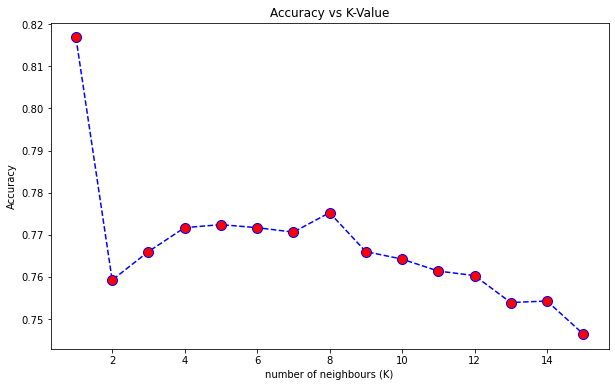

In [99]:

plt.figure(figsize=(10,6))
plt.plot(range(1,16),acc,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K-Value')
plt.xlabel('number of neighbours (K)')
plt.ylabel('Accuracy')
plt.show()

In [52]:
# subjects_accuracy = pd.DataFrame(columns={'Accuracy_Modified'})
# sub = []
# pca_movement = []

# for s in range(1,28):
#     subject = 'S' + str(s)
#     dff_sub = pd.DataFrame.from_dict(extractSubject(subject))
#     df_sub = pd.DataFrame(columns={'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
#                                   'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
#                                   'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
#                                   'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
#                                   'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
#                                   'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
#                                   'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
#                                   'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
#                                   'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
#                                   'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
#                                   'Train','Movement'})
#     for e in range(1, 11):
#         i = 0
#         electrode = 'Electrode' + str(e)
#         for m in range(1,53):
#                 M = dff_sub['Movement'+str(m)][electrode]
#                 for r in range(1, 7):
#                     rep = "R" + str(r)
#                     if (r in [1, 3, 4, 6]):
#                         train = 1
#                     else:
#                         train = 0
            
#                     for x in range(0, len(M[rep]), 20):
#                         df_sub.at[i, 'RMS' + str(e)] = rms(M[rep][x:x + 50])
#                         df_sub.at[i, 'MAV' + str(e)] = mav(M[rep][x:x + 50])
#                         df_sub.at[i, 'VAR' + str(e)] = var(M[rep][x:x + 50])
#                         df_sub.at[i, 'WL' + str(e)] = wl(M[rep][x:x + 50])
#                         df_sub.at[i, 'IAV' + str(e)] = iav(M[rep][x:x + 50])
#                         df_sub.at[i, 'Movement'] = m
#                         df_sub.at[i, 'Train'] = train
                    
#                         i += 1
                    
#     features = { 
#             'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
#             'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
#             'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
#             'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
#             'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
#             'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
#             'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
#             'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
#             'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
#             'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
#     }

#     X_train = df_sub[df_sub['Train'] == 1].loc[:, features]
#     scalar =  StandardScaler()
#     scalar = scalar.fit(X_train)
#     X_train = scalar.transform(X_train)
#     X_test = df_sub[df_sub['Train'] == 0].loc[:, features]
#     X_test = scalar.transform(X_test)
#     y_train = df_sub[df_sub['Train'] == 1].loc[:, 'Movement']
#     y_test = df_sub[df_sub['Train'] == 0].loc[:, 'Movement']

#     y_train = np.asarray(y_train).astype('float64')
#     y_test = np.asarray(y_test).astype('float64')
#     X_train = np.asarray(X_train).astype('float64')

#     clf = RandomForestClassifier()
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     y_test_new = [most_frequent(y_test[x:x + 11]) for x in range(0, len(y_test), 11)]
#     y_predicted_new = [most_frequent(y_pred[x:x + 11]) for x in range(0, len(y_pred), 11)]
#     accuracy_modified = accuracy_score(y_test_new, y_predicted_new)

#     print("Window Accuracy",accuracy)
#     print("Movement Accuracy", accuracy_modified)
#     sub.append(accuracy_modified)

DB1/S1/S1_A1_E1.mat
Window Accuracy 0.6512744735869966
Movement Accuracy 0.8866396761133604
DB1/S2/S2_A1_E1.mat
Window Accuracy 0.527890653860362
Movement Accuracy 0.7368421052631579
DB1/S3/S3_A1_E1.mat
Window Accuracy 0.5484467455621301
Movement Accuracy 0.7967479674796748
DB1/S4/S4_A1_E1.mat
Window Accuracy 0.5207100591715976
Movement Accuracy 0.7357723577235772
DB1/S5/S5_A1_E1.mat
Window Accuracy 0.613905325443787
Movement Accuracy 0.8373983739837398
DB1/S6/S6_A1_E1.mat
Window Accuracy 0.56789224608664
Movement Accuracy 0.804
DB1/S7/S7_A1_E1.mat
Window Accuracy 0.7034023668639053
Movement Accuracy 0.8536585365853658
DB1/S8/S8_A1_E1.mat
Window Accuracy 0.6335059171597633
Movement Accuracy 0.8252032520325203
DB1/S9/S9_A1_E1.mat
Window Accuracy 0.6564349112426036
Movement Accuracy 0.8455284552845529
DB1/S10/S10_A1_E1.mat
Window Accuracy 0.6220414201183432
Movement Accuracy 0.8577235772357723
DB1/S11/S11_A1_E1.mat
Window Accuracy 0.6612426035502958
Movement Accuracy 0.8252032520325203
D

[0.89 0.74 0.8  0.74 0.84 0.8  0.85 0.83 0.85 0.86 0.83 0.86 0.73 0.76
 0.64 0.72 0.75 0.67 0.74 0.86 0.89 0.89 0.74 0.78 0.86 0.83 0.8 ]


ValueError: The number of FixedLocator locations (27), usually from a call to set_ticks, does not match the number of ticklabels (26).

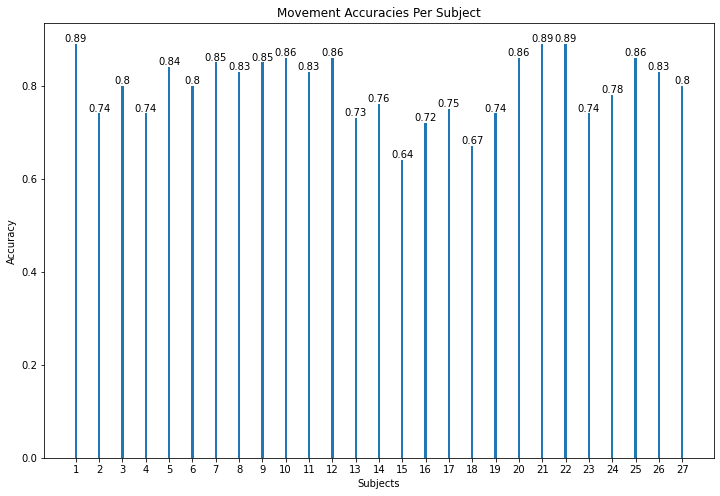

In [75]:

# sub = np.around(sub, decimals=2)
# print(sub)
# subjects_label = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
#             'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
#             'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27']
# x =  range(1,28)  # the label locations
# width = 0.1  # the width of the bars
# fig, ax = plt.subplots(figsize=(12, 8))
# movement = ax.bar(x, sub, width, label='Movement Accuracy')

# ax.set_ylabel('Accuracy')
# ax.set_xlabel('Subjects')
# ax.set_title('Movement Accuracies Per Subject')
# ax.bar_label(movement)
# # ax.set_xticks(subjects, subjects)
# ax.set_xticks(x, subjects_label)
# ax.legend()
# ax.bar_label(movement)
# fig.tight_layout()
# plt.show()

In [ ]:
from sklearn import svm
features = { 
    # 'RMS1','RMS2','RMS3','RMS3','RMS4','RMS5','RMS6','RMS7','RMS8','RMS9','RMS10'
            'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
            'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
            'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
            'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
            'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
            'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
            'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
            'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
            'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
            'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
            }

# ######### Standard SCALER ########
# print("Standard Scaler")
# X_train = final_df[final_df['Train'] == 1].loc[:, features]
# scalar =  StandardScaler()
# scalar = scalar.fit(X_train)
# X_train = scalar.transform(X_train)
# X_test = final_df[final_df['Train'] == 0].loc[:, features]
# X_test = scalar.transform(X_test)
# y_train = final_df[final_df['Train'] == 1].loc[:, 'Movement']
# y_test = final_df[final_df['Train'] == 0].loc[:, 'Movement']
# y_train = np.asarray(y_train).astype('float64')
# y_test = np.asarray(y_test).astype('float64')
# X_train = np.asarray(X_train).astype('float64')

# for k in ['linear', 'poly', 'sigmoid', 'precomputed']:
#     print(k)
#     clf = svm.SVC(kernel='poly')
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     y_test_new = [most_frequent(y_test[x:x + 26]) for x in range(0, len(y_test), 26)]
#     y_predicted_new = [most_frequent(y_pred[x:x + 26]) for x in range(0, len(y_pred), 26)]
#     accuracy_modified = accuracy_score(y_test_new, y_predicted_new)
#     print("Window Accuracy",accuracy)
#     print("Movement Accuracy", accuracy_modified)

# ######### MIN MAX SCALER ########
# print("Min Max Scaler")
# X_train = final_df[final_df['Train'] == 1].loc[:, features]
# scalar =  MinMaxScaler()
# scalar = scalar.fit(X_train)
# X_train = scalar.transform(X_train)
# X_test = final_df[final_df['Train'] == 0].loc[:, features]
# X_test = scalar.transform(X_test)
# y_train = final_df[final_df['Train'] == 1].loc[:, 'Movement']
# y_test = final_df[final_df['Train'] == 0].loc[:, 'Movement']
# y_train = np.asarray(y_train).astype('float64')
# y_test = np.asarray(y_test).astype('float64')
# X_train = np.asarray(X_train).astype('float64')

# for k in ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']:
#     print(k)
#     clf = svm.SVC(kernel=k)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     y_test_new = [most_frequent(y_test[x:x + 26]) for x in range(0, len(y_test), 26)]
#     y_predicted_new = [most_frequent(y_pred[x:x + 26]) for x in range(0, len(y_pred), 26)]
#     accuracy_modified = accuracy_score(y_test_new, y_predicted_new)
#     print("Window Accuracy",accuracy)
#     print("Movement Accuracy", accuracy_modified)

######### NO SALER ########
print("NO Scaler")
X_train = final_df[final_df['Train'] == 1].loc[:, features]
X_test = final_df[final_df['Train'] == 0].loc[:, features]
y_train = final_df[final_df['Train'] == 1].loc[:, 'Movement']
y_test = final_df[final_df['Train'] == 0].loc[:, 'Movement']
y_train = np.asarray(y_train).astype('float64')
y_test = np.asarray(y_test).astype('float64')
X_train = np.asarray(X_train).astype('float64')

for k in ['linear', 'sigmoid', 'precomputed']:
    print(k)
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_test_new = [most_frequent(y_test[x:x + 26]) for x in range(0, len(y_test), 26)]
    y_predicted_new = [most_frequent(y_pred[x:x + 26]) for x in range(0, len(y_pred), 26)]
    accuracy_modified = accuracy_score(y_test_new, y_predicted_new)
    print("Window Accuracy",accuracy)
    print("Movement Accuracy", accuracy_modified)


# # print("Y_Train" , y_train.shape)
# # print("Y_Test" , y_test.shape)
# # print("X_Train" , X_train.shape)
# # print("X_Test" , X_test.shape)

# # y_train = np.asarray(y_train).astype('float64')
# # y_test = np.asarray(y_test).astype('float64')
# # X_train = np.asarray(X_train).astype('float64')

# # y_train = tf.one_hot(y_train, 50)
# # y_test = tf.one_hot(y_test, 50)
# # print("Ba3d l 7adsa")
# # print("Y_Train" , y_train.shape)
# # input = Input(shape =(50,))
# # x = Dense(512, activation='relu')(input)
# # x = Dense(256, activation='relu')(x)  
# # x = Dense(256, activation='relu')(x)
# # ouput = Dense(50, activation='softmax')(x)
# # model = Model(input, ouput)
# # model.compile(optimizer=Adam(learning_rate=0.005), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
# # model.fit(X_train, y_train, epochs=100)
# # print(model.evaluate(X_test, y_test))
# # predicted = model.predict(X_test)



In [ ]:

# pcas = []
# x = final_df.loc[:, features]
# y = final_df.loc[:,['Movement']].values
# y=y.astype('int')
# x = StandardScaler().fit_transform(x)
# for p in range(5,51):
#     pca = PCA(n_components=p)
#     principalComponents = pca.fit_transform(x)
#     principalDf = pd.DataFrame(data=principalComponents)
#     finalDf = pd.concat([principalDf, final_df['Movement'], final_df['Train']], axis=1)

#     X_train = finalDf[finalDf['Train'] == 1]
#     X_train.drop({'Movement', 'Train'}, axis=1, inplace=True)
#     X_test = finalDf[finalDf['Train'] == 0]
#     X_test.drop({'Movement', 'Train'}, axis=1, inplace=True)
#     y_train = finalDf[finalDf['Train'] == 1]['Movement'].astype('int')
#     y_test = finalDf[finalDf['Train'] == 0]['Movement'].astype('int')

#     clf = RandomForestClassifier()
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     y_test_new = [most_frequent(y_test[x:x + 11]) for x in range(0, len(y_test), 11)]
#     y_predicted_new = [most_frequent(y_pred[x:x + 11]) for x in range(0, len(y_pred), 11)]
#     accuracy_modified = accuracy_score(y_test_new, y_predicted_new)

#     print("Window Accuracy",accuracy)
#     print("Movement Accuracy", accuracy_modified)
#     pcas.append(accuracy_modified)

tf.Tensor(
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.], shape=(50,), dtype=float32)
[6.22559497e-08 2.52733435e-02 3.00039016e-02 2.61483416e-02
 1.89811178e-02 2.17039976e-02 2.08186656e-02 2.33653169e-02
 2.71557402e-02 2.29848828e-02 3.01359836e-02 1.90238338e-02
 2.05076728e-02 1.13982176e-02 2.13716403e-02 1.81448739e-02
 6.92596333e-03 2.92308312e-02 2.34018527e-02 2.07329728e-02
 2.34837700e-02 1.99910887e-02 2.34945659e-02 2.47931201e-02
 1.43656405e-02 1.33768311e-02 1.99216586e-02 5.73136937e-03
 2.27423906e-02 1.56588331e-02 1.77109037e-02 7.82484468e-03
 1.97790451e-02 1.94790494e-02 2.82972883e-02 2.40613241e-02
 2.67190374e-02 1.39267435e-02 1.89154223e-02 2.42363475e-02
 2.41824817e-02 2.83982474e-02 2.85691060e-02 2.89683435e-02
 2.56955866e-02 2.54868027e-02 2.25997344e-02 2.53125769e-03
 9.43093840e-03 2.31904676e-03]
